# For different sigmas you compute signal to noise

In [1]:
import numpy as np
import _pickle as pickle
import matplotlib.pyplot as plt
import os
from sklearn import metrics

#files=['data_1.e+04.p', 'data_1.e-03.p', 'data_1.e-01.p', 'data_1.e+00.p', 'data_1.e-02.p', 'data_1.e-05.p']
files=os.listdir('/home/beate/Dokumente/00. UNI/0.Stipendium/Kolleg/network_reconstruction/4.Treffen/cubicSimulDifferentNoiseLevel/Data/.')
counter = -1
#print(len(files))
expa=np.zeros((10,13))
for i in range(1,len(files)):
    counter = counter + 1
    with open("/home/beate/Dokumente/00. UNI/0.Stipendium/Kolleg/network_reconstruction/4.Treffen/cubicSimulDifferentNoiseLevel/Data/%s"%files[i], "rb" ) as fd:
        data=pickle.load(fd, fix_imports=True, encoding="latin1")
        C = np.asarray(data)
        
        
        B=np.zeros((10,2000000))
        for i in range(0,10):
            a=C[:,i,:]
            a=a.reshape(1,2000000)
            B[i,:]=a
        exp=np.zeros((10,10))
        for j in range(0,10):
            a=B[j,:]
            for i in range(0,10):
                b=B[i,:]
                exp[i,j]=np.mean(np.multiply(b,a))
        for k in range(0,10):
            expa[counter,k]=exp[k,k] #diag elements
        expa[counter,11]=exp[2,7] #not diag
        expa[counter,12]=exp[6,8] #not diag


#sigma=(100,10,0.01,0.1,0.001,1000,1e-5,100000,10000,0.001,1)
sigma=(10,0.01,0.1,0.001,1000,1e-5,100000,10000,0.0001,1)
sigma = np.asarray(sigma)
sigma2=sigma**2
print(sigma2)

print(expa.shape)

for i in range(0,10):
    expa[i,:]=np.nan_to_num(expa[i,:], copy=True)
    expa[i,:]=expa[i,:]/sigma2[i]
print(expa.shape)

print(expa.shape)

sigma=(10,0.01,0.1,0.001,1000,1e-5,100000,10000,0.0001,1)
#not functioning: sigma4,6,7
sigma=(sigma[5],sigma[-2],sigma[3],sigma[1],sigma[2],sigma[-1],sigma[0])
expanew=np.zeros((7,13))
expanew[0,:]=expa[5,:]
expanew[1,:]=expa[-2,:]
expanew[2,:]=expa[3,:]
expanew[3,:]=expa[1,:]
expanew[4,:]=expa[2,:]
expanew[5,:]=expa[-1,:]
expanew[6,:]=expa[0,:]


for i in range(0,13):
    plt.plot(sigma,expanew[:,i])
    plt.xscale('log')
    plt.show()

# Signal to noise for all off diag terms

In [2]:
#files=['data_1.e+04.p', 'data_1.e-03.p', 'data_1.e-01.p', 'data_1.e+00.p', 'data_1.e-02.p', 'data_1.e-05.p']
files=os.listdir('/home/beate/Dokumente/00. UNI/0.Stipendium/Kolleg/network_reconstruction/4.Treffen/cubicSimulDifferentNoiseLevel/Data/.')
#some are zeros: 1000,100000,10000 --> last 3 ones: , and 100 doesn't work for some reason files[5],files[8],files[7]
files=(files[6],files[-2],files[4],files[2],files[3],files[-1],files[1],files[0])
print(files)
counter = 0
#print(len(files))
#expa=np.zeros((len(files),100-10)) #NxN matrix
expadiag=np.zeros((len(files),10))
for i in range(0,len(files)):
    print(files[i])
    with open("/home/beate/Dokumente/00. UNI/0.Stipendium/Kolleg/network_reconstruction/4.Treffen/cubicSimulDifferentNoiseLevel/Data/%s"%files[i], "rb" ) as fd:
        data=pickle.load(fd, fix_imports=True, encoding="latin1")
        C = np.asarray(data)
        print(np.min(C))
        #print(C)
        B=np.zeros((10,2000000))
        for p in range(10):
            a=C[:,p,:]
            a=a.reshape(1,2000000)
            B[p,:]=a
        exp=np.zeros((10,10))
        for j in range(10):
            a=B[j,:]
            for r in range(10):
                b=B[r,:]
                exp[r,j]=np.mean(np.multiply(b,a))
        for k in range(0,10):
            expadiag[counter,k]=exp[k,k]
            #for l in range(0,10):
             #   expa[counter,k]=exp[k,l]
            #expa[counter,k]=exp[k,k] #diag elements
        counter = counter + 1
        


('1.data_1e-05.p', '2.data_0.0001.p', '3.data_0.001.p', '4.data_0.01.p', '5.data_0.1.p', 'data_1.0.p', 'data_10.0.p', 'data_100.0.p')
1.data_1e-05.p
-0.0008
2.data_0.0001.p
-0.0064
3.data_0.001.p
-0.0509
4.data_0.01.p
-0.1983
5.data_0.1.p
-0.6548
data_1.0.p
-2.1802
data_10.0.p
-7.0963
data_100.0.p
-22.6642


In [3]:
#sigma=[1e2,1e1,0.01,0.1,0.001,1000,1e-5,100000,10000,0.0001,1]
sigma=[1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2]
sigma = np.asarray(sigma)
sigma2=sigma**2
#sigma2=1
print(sigma2)

[  1.00000000e-10   1.00000000e-08   1.00000000e-06   1.00000000e-04
   1.00000000e-02   1.00000000e+00   1.00000000e+02   1.00000000e+04]


In [4]:
print(sigma.shape)

(8,)


In [9]:
sigma=sigma.reshape(8,1)
#expadiag[expadiag<1e-5]=0 ##because there an not be dynamiccs below that as we cut of at 10^-4
E=np.divide(expadiag,sigma)


O=np.zeros((11,11))
O[:,1:]=E
for i in range(0,11):
    O[i,0]=sigma[i]
#print(O)
P=np.zeros((8,10))
P[0,:]=O[6,1:]
P[1,:]=O[-2,1:]
P[2,:]=O[4,1:]
P[3,:]=O[2,1:]
P[4,:]=O[3,1:]
P[5,:]=O[-1,1:]
P[6,:]=O[1,1:]
P[7,:]=O[0,1:]
print(P.shape)

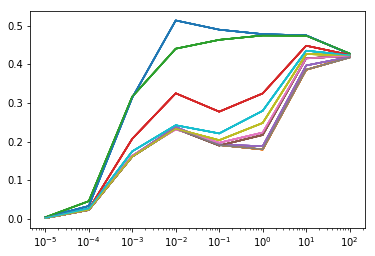

In [10]:
#for i in range(0,10):
 #   plt.plot(sigma,expa[:,i])
#plt.xlim(1e-3,1e2)
#plt.ylim(0,60)
#plt.xscale('log')
#plt.show()
#sigma=[1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2]
#sigma = np.asarray(sigma)
for i in range(0,8):
    plt.plot(sigma,E)
#plt.xlim(1e-3,1e2)
#plt.ylim(0,60)
plt.xscale('log')
plt.figure(figsize=(200,70))
plt.show()

In [ ]:
print(files)